### Import Necessary Libraries

In [1]:
# NumPy: For mathematical funcations, array, matrices operations
import numpy as np 

# Graph: Plotting graphs and other visula tools
import pandas as pd
import seaborn as sns

# sns.set_palette("muted")
sns.set(color_codes=True)

# color_palette = sns.color_palette()
# To enable inline plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

### General Util methods


In [2]:
# Remove outliers from data frame
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

### Load Data

In [3]:
# Load data set
# Import CSV data using pandas data frame
df_original = pd.read_csv('vehicle-2.csv')

# Print total columns
print("Total Colums in dataframe: ", len(df_original.columns))

# Prepare columns names
df_original_columns = []
for column in df_original.columns:
    df_original_columns.append(column)


    
print("Columns list {}".format(df_original_columns))
print("***********************************************************************************************************************")

# Prepare mapping of column names for quick access
df_original_columns_map = {}
map_index: int = 0
for column in df_original_columns:
    df_original_columns_map[map_index] = column
    map_index = map_index + 1
    
print("Columns Map {}".format(df_original_columns_map))

# We have separated out columns and its mapping from data, at any point of time during data analysis or cleaning we 
# can directly refer or get data from either index or column identifier


Total Colums in dataframe:  19
Columns list ['compactness', 'circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.2', 'hollows_ratio', 'class']
***********************************************************************************************************************
Columns Map {0: 'compactness', 1: 'circularity', 2: 'distance_circularity', 3: 'radius_ratio', 4: 'pr.axis_aspect_ratio', 5: 'max.length_aspect_ratio', 6: 'scatter_ratio', 7: 'elongatedness', 8: 'pr.axis_rectangularity', 9: 'max.length_rectangularity', 10: 'scaled_variance', 11: 'scaled_variance.1', 12: 'scaled_radius_of_gyration', 13: 'scaled_radius_of_gyration.1', 14: 'skewness_about', 15: 'skewness_about.1', 16: 'skewness_about.2', 17

# Data pre-processing

### Data shape

In [4]:
df_original.shape

(846, 19)

### Data Info

In [5]:
df_original.info()
# All columns are numeric in nature except target column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
df_original.head(32)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   
20           84         47.0                  75.0         153.0   
21           84         37.0                  53.0         121.0   
22           94         43.0                  64.0         173.0   
23           87         39.0                  70.0         148.0   
24           99         53.0                 105.0         219.0   
25           85         45.0                  80.0         154.0   
26           83         36.0                  54.0         119.0   
27          107         54.0                  98.0         203.0   
28          102         45.0                  85.0         193.0   
29           80         38.0                  63.0         129.0   
30           89         43.0                  85.0         160.0   
31           88         42.0                  77.0         151.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   
20                  64.0                        6          154.0   
21                  59.0                        5          123.0   
22                  69.0                        7          150.0   
23                  61.0                        7          143.0   
24                  66.0                       11          

In [7]:
# Data Describe 
df_original.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### Target Colum Distribution

In [8]:
pd.value_counts(df_original['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

### Count Plot For target column

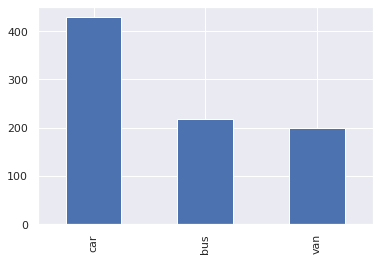

In [9]:
pd.value_counts(df_original["class"]).plot(kind="bar")

### Checking for Missing value, duplicate data, incorrect data and perform data cleansing

### Empty NA Values

In [10]:
# Loading data in excel sheets quickly tells that there are Blank values in some columns
# So print count of them as we are sure they exists

df_original.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### Duplicates

In [11]:
df_duplicates = df_original.duplicated()

print('Number of duplicate rows = {}'.format(df_duplicates.sum()))

# No duplicates

Number of duplicate rows = 0


### Replace missing values with median

In [12]:
# Create a copy for df before operating on it
df_main = df_original.copy()

# Replace all missing value from thei median
for column in df_original_columns:
    if df_main[column].isna().sum() > 0:
        median = df_main[column].median()
        df_main[column] = df_main[column].fillna(df_main[column].median())
        


# After replacement confirm that there are no mising values
df_main.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### Lable encoding target column

In [13]:
from sklearn import preprocessing
target_column = 'class'
le = preprocessing.LabelEncoder()
le.fit(df_main[target_column])
df_main[target_column] = le.transform(df_main[target_column]) 

df_main.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

### Presenceof outliers

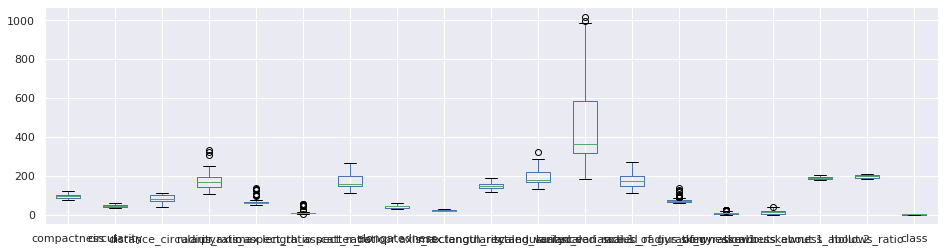

In [14]:
df_main.boxplot(figsize=(16,4))


# Understanding the attributes

### Pait Plot

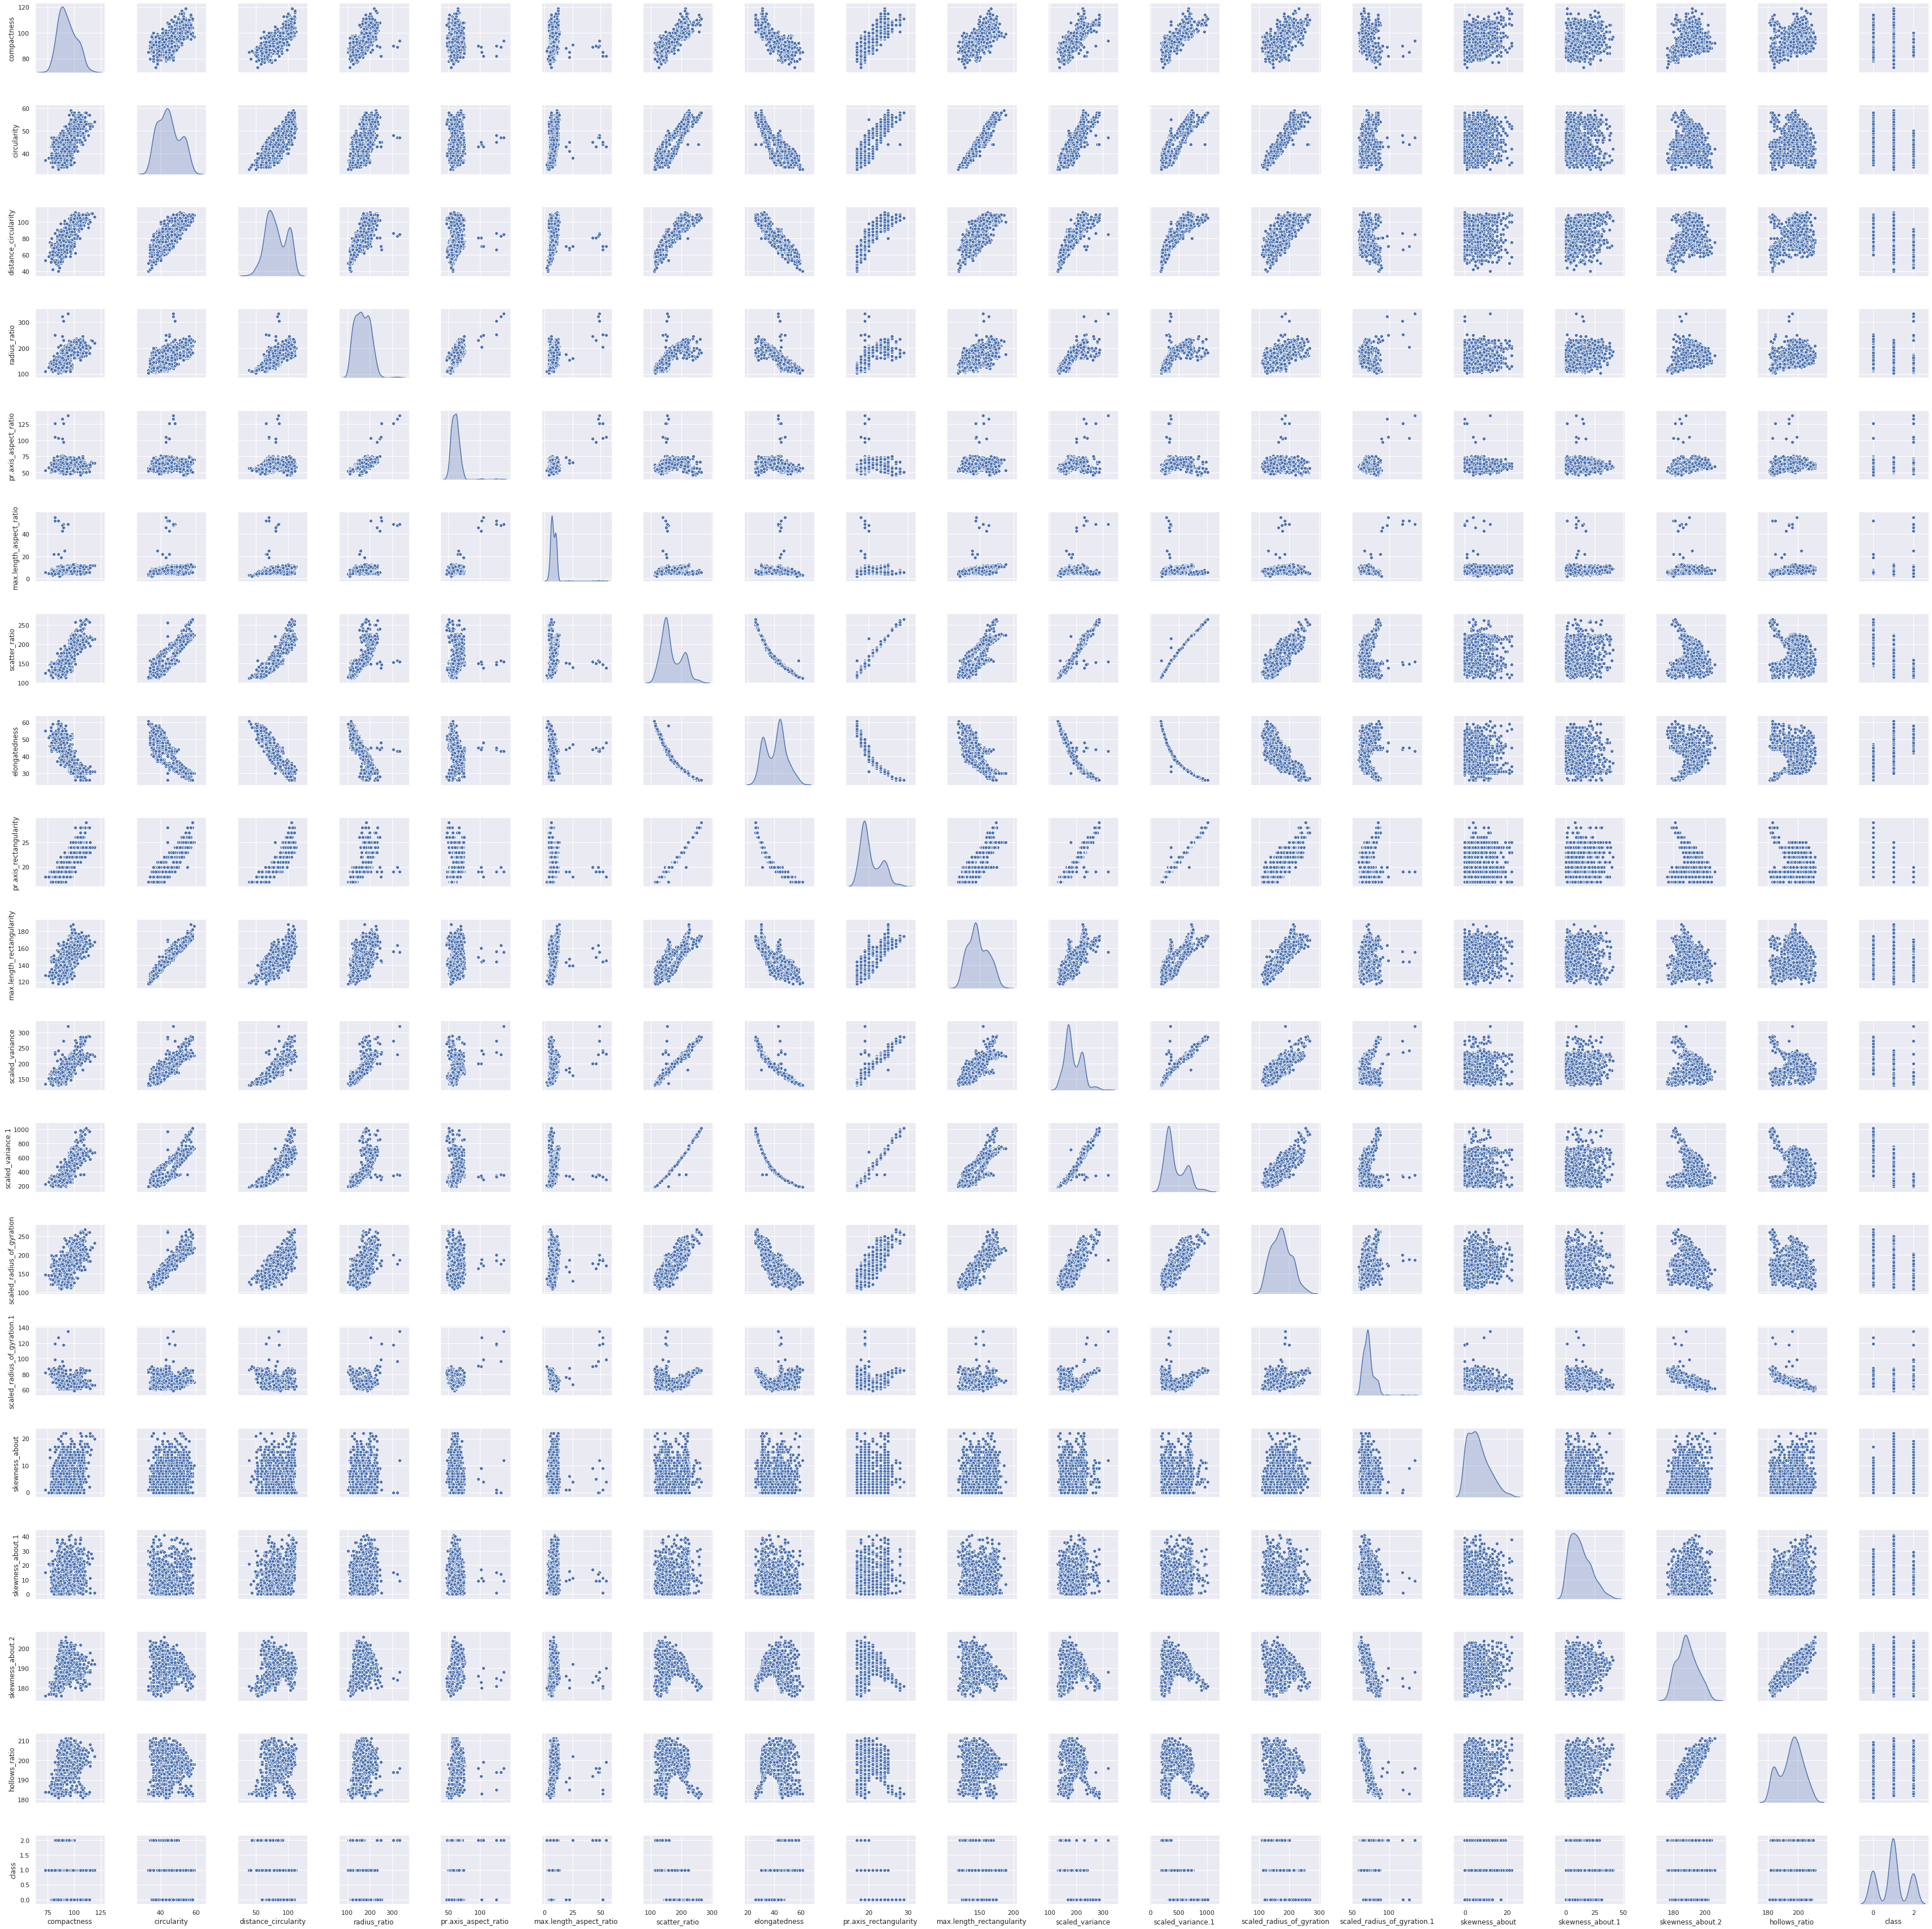

In [15]:
sns.pairplot(df_main,diag_kind='kde')

We can see there are some columns who has strong positive and negative correlations with them and some attributes where there is no relationship at all.

When there is not relation then distribution show values are saturated mostly in lower range

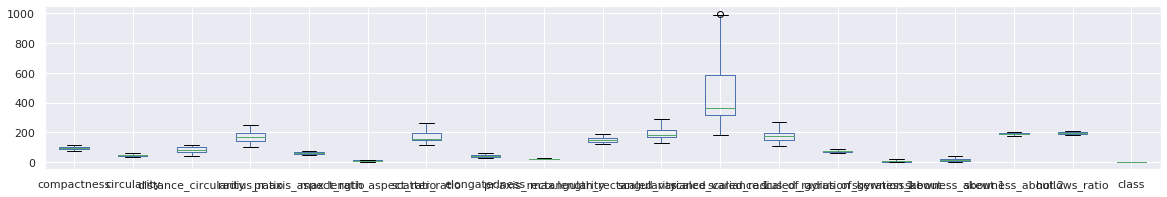

In [16]:

# Treat outliers by removing them from data frame

for name in df_original_columns:
    df_main = remove_outlier(df_main, name)
    
df_main.boxplot(figsize=(20,3))  



### Relationship Analysis between columns

In [17]:
# Circularity
pd.crosstab(df_original['class'], df_original['circularity'])

circularity  33.0  34.0  35.0  36.0  37.0  38.0  39.0  40.0  41.0  42.0  ...  \
class                                                                    ...   
bus             0     0     1     3     7     6     5     6    11    22  ...   
car             2     7     7    25    21    33    22    21    11    10  ...   
van             0     2     8    13    14     8    15    15    13    15  ...   

circularity  50.0  51.0  52.0  53.0  54.0  55.0  56.0  57.0  58.0  59.0  
class                                                                    
bus             3     7     4     3     5     4     4     5     2     0  
car            12    22    24    27    34    29    11     7     3     1  
van             1     0     0     0     0     0     0     0     0     0  

[3 rows x 27 columns]

In [18]:
# elongatedness

pd.crosstab(df_original['class'], df_original['elongatedness'])

elongatedness  26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0  \
class                                                                       
bus              10     7     7     2     4     4     5     5     4     6   
car               0     0     0     0    46    69    39    23    17    19   
van               0     0     0     0     0     0     0     0     0     0   

elongatedness  ...  51.0  52.0  53.0  54.0  55.0  56.0  57.0  58.0  59.0  61.0  
class          ...                                                              
bus            ...     0     0     0     0     0     0     0     0     0     0  
car            ...     8     6     2     6     4     1     1     1     4     1  
van            ...    10    14     8     4     6     5    11     3     0     0  

[3 rows x 35 columns]

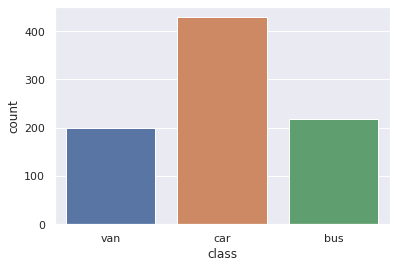

In [19]:
sns.countplot(x='class',data=df_original)

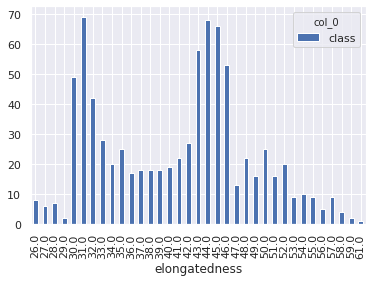

In [20]:
my_tab = pd.crosstab(index = df_main["elongatedness"], columns="class")
my_tab.plot.bar()

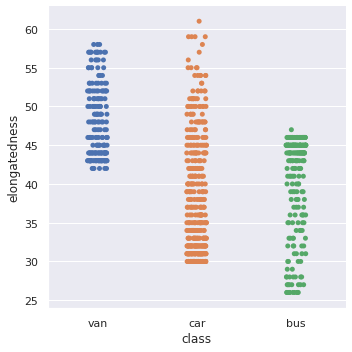

In [21]:
sns.catplot(y='elongatedness', x='class', data=df_original)

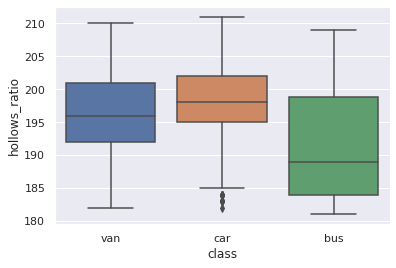

In [22]:
sns.boxplot(y="hollows_ratio", x="class", data=df_original)


# Use PCA  from scikit learn and elbow plot 

## Data standardization

In [23]:
#Seperating independent and dependent variables

df_main_x = df_main.copy().drop(['class'], axis = 1) 


df_main_y = df_main['class']



## Applying standard scaler on independent variables

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

main_x_std =  sc.fit_transform(df_main_x)          

cov_matrix = np.cov(main_x_std.T)

print(cov_matrix)

[[ 1.00125     0.6820309   0.78405259  0.74227606  0.19083911  0.4874697
   0.81047449 -0.78714971  0.81180376  0.67228215  0.79102951  0.81229689
   0.5799107  -0.22877176  0.19648824  0.15409379  0.27644395  0.34695182]
 [ 0.6820309   1.00125     0.78931113  0.63986253  0.19579719  0.55736215
   0.84923993 -0.81909333  0.84666388  0.96389045  0.80941003  0.83897005
   0.93143236  0.09581471  0.13876728 -0.01777097 -0.13790252  0.02059698]
 [ 0.78405259  0.78931113  1.00125     0.80556652  0.23540693  0.66365071
   0.90662773 -0.9087174   0.89646303  0.76796723  0.8845952   0.88901217
   0.7055287  -0.20855287  0.0902941   0.26048402  0.10180217  0.30190632]
 [ 0.74227606  0.63986253  0.80556652  1.00125     0.6624979   0.44799068
   0.78946486 -0.84457152  0.76376941  0.57464025  0.79323498  0.77554997
   0.55371321 -0.37807297  0.03086436  0.1776359   0.39941785  0.48848375]
 [ 0.19083911  0.19579719  0.23540693  0.6624979   1.00125     0.12458654
   0.19343354 -0.29644537  0.163264

### Calculating Eigen Values & Vectors

In [25]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


In [26]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.757650251282248, array([-0.27145377, -0.28760699, -0.30142048, -0.27109421, -0.09445759,
       -0.19204301, -0.31170409,  0.30903612, -0.30891294, -0.27728699,
       -0.3038893 , -0.30825102, -0.26419955,  0.03064847, -0.03422758,
       -0.05699476, -0.02383256, -0.07329288])), (3.3694594125832893, array([-0.09497712,  0.1285343 , -0.04808098, -0.21067776, -0.26038515,
       -0.09132933,  0.06492838, -0.00421446,  0.07668489,  0.11945868,
        0.06343922,  0.0707986 ,  0.20070292,  0.5061171 , -0.0104502 ,
       -0.08062968, -0.50406925, -0.51094636])), (1.214267382592589, array([ 0.02705443,  0.21342971, -0.06605292, -0.05696139,  0.08029827,
        0.17503   , -0.11345582,  0.09537475, -0.10939406,  0.23154639,
       -0.15144406, -0.11702098,  0.20952423, -0.07364907,  0.52569369,
       -0.67396927,  0.05103722,  0.04825479])), (1.149795803689913, array([ 0.13069462, -0.03093262,  0.11345239, -0.24954959, -0.60824852,
        0.32051222, -0.00440986,  0.07591328,  0.02

In [27]:
total = sum(eigenvalues)
var_exp = [( i /total ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.1414912   72.83734035  79.57484836  85.9546281   90.96781645
  94.67377661  96.49487775  97.7654787   98.40655404  98.83353799
  99.18001751  99.4227584   99.58377841  99.72928046  99.83007959
  99.92588594  99.98250325 100.        ]


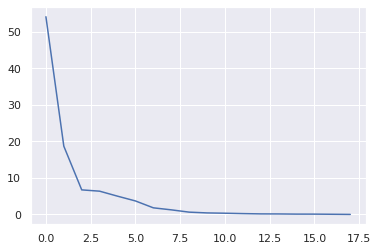

In [28]:
plt.plot(var_exp)

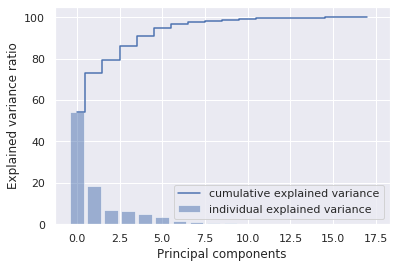

In [29]:
plt.bar(range(0,18), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(0,18),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [32]:
# Reducing from 19 to 5 dimension space
pca_reduced = np.array(eigvectors_sorted[0:5])
# projecting original data into principal component dimensions
main_x_4d = np.dot(main_x_std,pca_reduced.T)

#converting array to dataframe for pairplot
df_main_x_4d = pd.DataFrame(main_x_4d) 

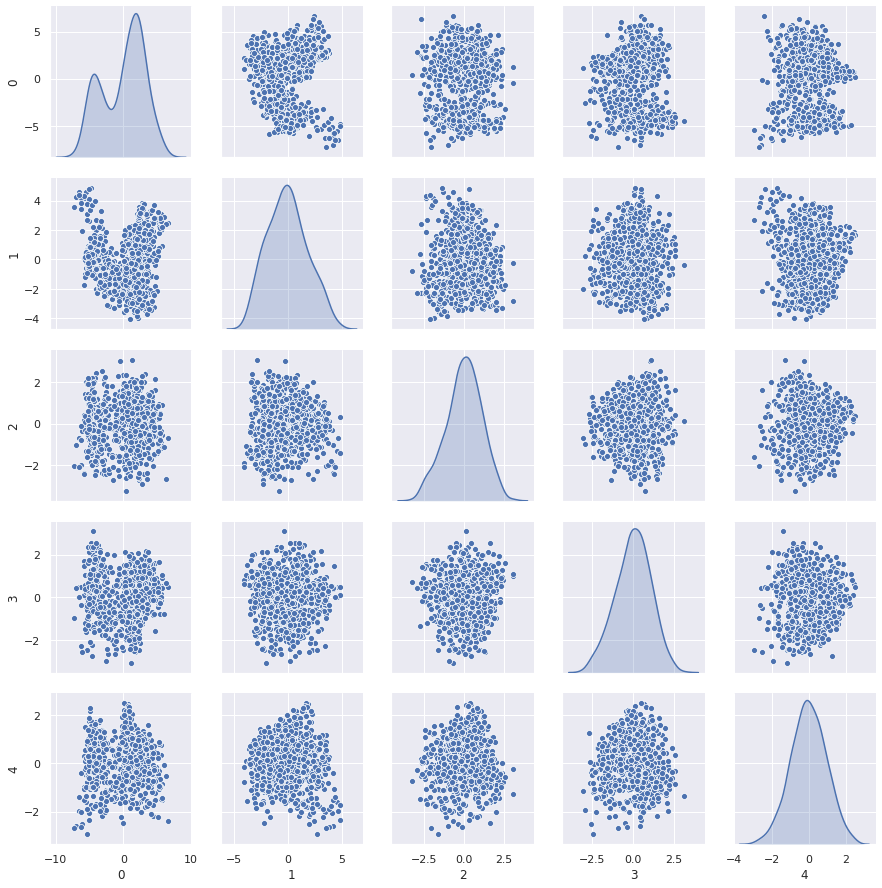

In [33]:
sns.pairplot(df_main_x_4d,diag_kind='kde')

In [39]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_main_x, df_main_y, test_size=test_size, random_state=seed)

# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

regression_model.score(X_test, y_test)

0.6336302682886078